In [1]:
# Final Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/mauricionoriega/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mauricionoriega/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd

df = pd.read_csv("global-data-on-sustainable-energy.csv")

display(df.head())


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Data cleaning

In [3]:
# Drop rows
df.dropna(how='all', inplace=True)

# Drop columns
threshold = (1 - 0.33) * len(df) # Change threshold to 33%
df.dropna(thresh=threshold, axis=1, inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill values in numerical columns with the mean
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill values in categorical columns with the mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

display(df.head())

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [4]:
v_n=df.isnull().sum()
v_n

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 6   Electricity from fossil fuels (TWh)                               3649 non-null   float64
 7   Electricity from nuclear (TWh)   

In [6]:
#Clasification
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols

Index(['Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

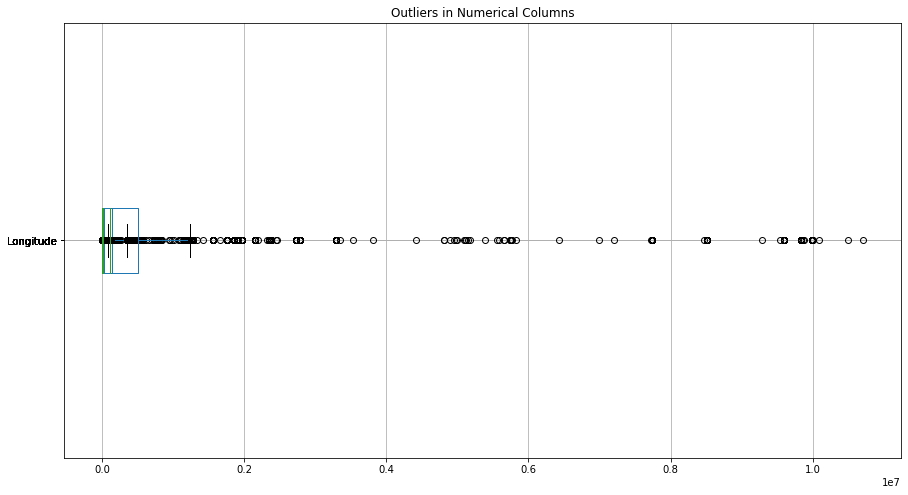

In [7]:
#Outliers
fig = plt.figure(figsize =(15, 8))
for col in numerical_cols:
    df.boxplot(column=col, vert=False)
plt.title("Outliers in Numerical Columns")
plt.show()

In [8]:
#Check for wrong info in categorical columns
entity_counts = df['Entity'].value_counts()
print(entity_counts)

Entity
Afghanistan      21
Oman             21
Netherlands      21
New Caledonia    21
New Zealand      21
                 ..
Zimbabwe         21
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, Length: 176, dtype: int64


Correlation check

In [9]:
Corr_Factors = df[numerical_cols].corr()
display(Corr_Factors)
Corr_Factors1 = abs(Corr_Factors)
display(Corr_Factors1)

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124581,0.071555,0.090168,-0.027241,0.032521,-0.004736,0.073722,0.029952,0.004196,-0.149249,0.022100,-0.183390,0.129667,-0.001628,0.003505,0.000944
Access to electricity (% of population),0.124581,1.000000,0.854515,0.246440,-0.766297,0.123863,0.127744,0.137903,-0.150473,0.454571,-0.245652,0.121980,-0.107104,0.403257,0.054956,0.420443,-0.102838
Access to clean fuels for cooking,0.071555,0.854515,1.000000,0.194777,-0.755960,0.100569,0.161107,0.124203,-0.117906,0.547108,-0.184132,0.090569,-0.121557,0.475801,0.074291,0.426953,-0.127654
Renewable-electricity-generating-capacity-per-capita,0.090168,0.246440,0.194777,1.000000,0.046615,0.040453,0.014609,0.128832,0.374835,0.000242,-0.051317,0.036642,-0.011733,0.004030,0.047971,-0.027931,-0.023933
Renewable energy share in the total final energy consumption (%),-0.027241,-0.766297,-0.755960,0.046615,1.000000,-0.129112,-0.131473,-0.063157,0.449611,-0.420561,0.245761,-0.128787,0.067505,-0.346178,-0.044281,-0.321410,0.017843
Electricity from fossil fuels (TWh),0.032521,0.123863,0.100569,0.040453,-0.129112,1.000000,0.645919,0.845067,-0.063766,0.105361,0.029734,0.948809,0.020893,0.107579,0.627389,0.110639,0.044613
Electricity from nuclear (TWh),-0.004736,0.127744,0.161107,0.014609,-0.131473,0.645919,1.000000,0.491857,0.071139,0.178980,-0.007280,0.582779,-0.048044,0.230436,0.468429,0.173460,-0.083877
Electricity from renewables (TWh),0.073722,0.137903,0.124203,0.128832,-0.063157,0.845067,0.491857,1.000000,0.091437,0.119569,0.008651,0.786492,-0.002500,0.139354,0.704554,0.112472,-0.016092
Low-carbon electricity (% electricity),0.029952,-0.150473,-0.117906,0.374835,0.449611,-0.063766,0.071139,0.091437,1.000000,-0.119080,0.046099,-0.051162,-0.014258,0.006487,0.044818,-0.029007,-0.044345
Primary energy consumption per capita (kWh/person),0.004196,0.454571,0.547108,0.000242,-0.420561,0.105361,0.178980,0.119569,-0.119080,1.000000,0.134636,0.092902,-0.034752,0.659315,0.114659,0.329887,0.039723


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124581,0.071555,0.090168,0.027241,0.032521,0.004736,0.073722,0.029952,0.004196,0.149249,0.022100,0.183390,0.129667,0.001628,0.003505,0.000944
Access to electricity (% of population),0.124581,1.000000,0.854515,0.246440,0.766297,0.123863,0.127744,0.137903,0.150473,0.454571,0.245652,0.121980,0.107104,0.403257,0.054956,0.420443,0.102838
Access to clean fuels for cooking,0.071555,0.854515,1.000000,0.194777,0.755960,0.100569,0.161107,0.124203,0.117906,0.547108,0.184132,0.090569,0.121557,0.475801,0.074291,0.426953,0.127654
Renewable-electricity-generating-capacity-per-capita,0.090168,0.246440,0.194777,1.000000,0.046615,0.040453,0.014609,0.128832,0.374835,0.000242,0.051317,0.036642,0.011733,0.004030,0.047971,0.027931,0.023933
Renewable energy share in the total final energy consumption (%),0.027241,0.766297,0.755960,0.046615,1.000000,0.129112,0.131473,0.063157,0.449611,0.420561,0.245761,0.128787,0.067505,0.346178,0.044281,0.321410,0.017843
Electricity from fossil fuels (TWh),0.032521,0.123863,0.100569,0.040453,0.129112,1.000000,0.645919,0.845067,0.063766,0.105361,0.029734,0.948809,0.020893,0.107579,0.627389,0.110639,0.044613
Electricity from nuclear (TWh),0.004736,0.127744,0.161107,0.014609,0.131473,0.645919,1.000000,0.491857,0.071139,0.178980,0.007280,0.582779,0.048044,0.230436,0.468429,0.173460,0.083877
Electricity from renewables (TWh),0.073722,0.137903,0.124203,0.128832,0.063157,0.845067,0.491857,1.000000,0.091437,0.119569,0.008651,0.786492,0.002500,0.139354,0.704554,0.112472,0.016092
Low-carbon electricity (% electricity),0.029952,0.150473,0.117906,0.374835,0.449611,0.063766,0.071139,0.091437,1.000000,0.119080,0.046099,0.051162,0.014258,0.006487,0.044818,0.029007,0.044345
Primary energy consumption per capita (kWh/person),0.004196,0.454571,0.547108,0.000242,0.420561,0.105361,0.178980,0.119569,0.119080,1.000000,0.134636,0.092902,0.034752,0.659315,0.114659,0.329887,0.039723


<AxesSubplot:>

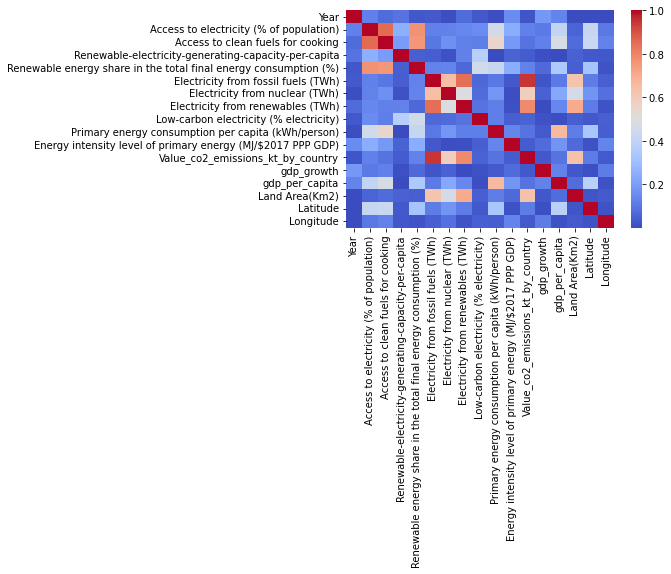

In [10]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map

<AxesSubplot:>

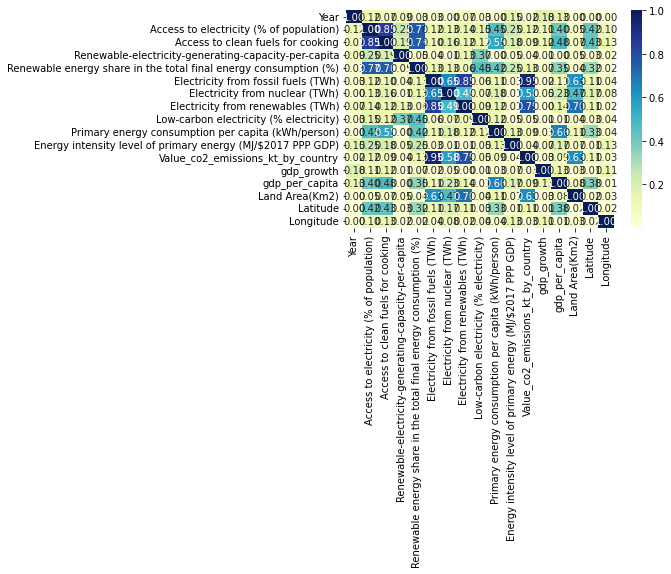

In [11]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 6   Electricity from fossil fuels (TWh)                               3649 non-null   float64
 7   Electricity from nuclear (TWh)   

In [14]:
import pandas as pd

# Columns most relevant to the project mission
selected_columns = [
    "Entity",
    "Year",
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable-electricity-generating-capacity-per-capita",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from renewables (TWh)",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Value_co2_emissions_kt_by_country",
    "gdp_per_capita",
    "gdp_growth",
    "Latitude",
    "Longitude"
]

# Filter dataset
df_focus = df[selected_columns]


In [15]:
df_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 15 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 6   Electricity from renewables (TWh)                                 3649 non-null   float64
 7   Low-carbon electricity (% electri